## KAPUDASI_SY86412_Final_Project

## 1. Business Understanding:


### Context
My project tackles recognizing fraudulent credit card transactions. This aspires to protects users from unwarranted charges, fosters a secure financial environment by preventing credit card misuse, and ultimately builds trust between customers and the credit card companies they rely on.
### Dataset Description
The dataset contains transactions made by credit cards in September 2013 by European cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions.



1.   It contains only numerical input variables which are the result of a PCA transformation.
2.   Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'.
3.    Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.
4.    The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning
5.    Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

### Acknowledgements
The dataset has been collected and analysed during a research collaboration of Worldline and the Machine Learning Group (http://mlg.ulb.ac.be) of ULB (Université Libre de Bruxelles) on big data mining and fraud detection.

## 2. Importing Libraries

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install --upgrade imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [41]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, precision_recall_curve, f1_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.svm import SVC 
from xgboost import XGBClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.utils import resample
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

## 3. EDA

## 3.1 Loading the dataset

In [4]:
df = pd.read_csv('creditcard.csv')

## 3.2 Data head

In [5]:
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## 3.3 Generating summary statistics of the numerical columns in my DataFrame

In [6]:
df.describe().T.style.set_properties(**{'background-color': 'grey','color': 'white','border-color': 'white'})

,count,mean,std,min,25%,50%,75%,max
Time,284807.000000,94813.859575,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.000000,0.000000,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.000000,0.000000,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.000000,-0.000000,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.000000,0.000000,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.000000,0.000000,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.000000,0.000000,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.000000,-0.000000,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.000000,0.000000,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.000000,-0.000000,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


## 3.4 Concise summary of my DataFrame

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

## 3.5 Checking unique values

In [8]:
df.nunique()

Time      124592
V1        275663
V2        275663
V3        275663
V4        275663
V5        275663
V6        275663
V7        275663
V8        275663
V9        275663
V10       275663
V11       275663
V12       275663
V13       275663
V14       275663
V15       275663
V16       275663
V17       275663
V18       275663
V19       275663
V20       275663
V21       275663
V22       275663
V23       275663
V24       275663
V25       275663
V26       275663
V27       275663
V28       275663
Amount     32767
Class          2
dtype: int64

## 3.6 Checking  missing values

In [9]:
print("Missing values:", df.isnull().sum())

Missing values: Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


## 3.7 Identify Target Variable and Features
### Class: This is the column indicating fraud (1) or not (0)

In [10]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

## 3.8 Target variable distribution 
### 3.8.1 Fraud vs Non-Fraud transactions

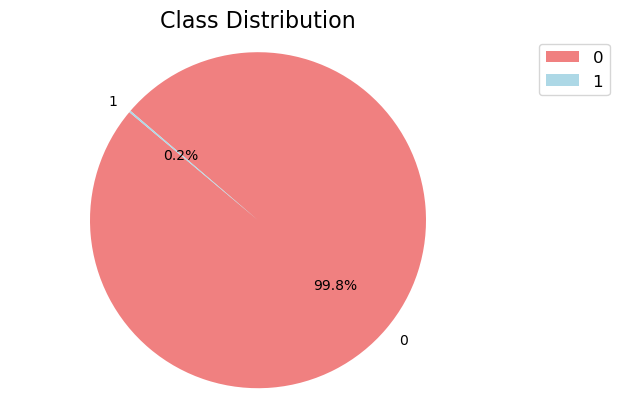

In [11]:
class_counts = df['Class'].value_counts()
pastel_colors = ['lightcoral', 'lightblue', 'lightgreen', 'lightyellow', 'lightpink']
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", startangle=140, colors=pastel_colors[:len(class_counts)])
plt.title('Class Distribution', fontsize=16)
plt.axis('equal') 
plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize=12)
plt.show()

### 3.8.2 Distribution of Feature(V1) by Class

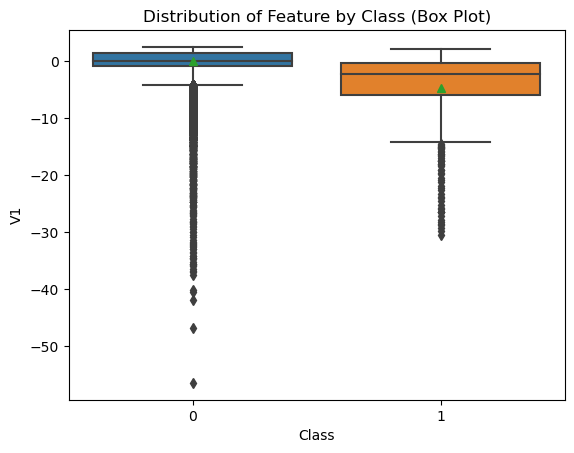

In [12]:
sns.boxplot(
    x = "Class",
    y = "V1",  # Replace with your actual feature name
    showmeans=True,
    data=df
)
plt.title('Distribution of Feature by Class (Box Plot)')
plt.show()


### 3.8.3 Scatter Plot for 2 features(V14 and V28)

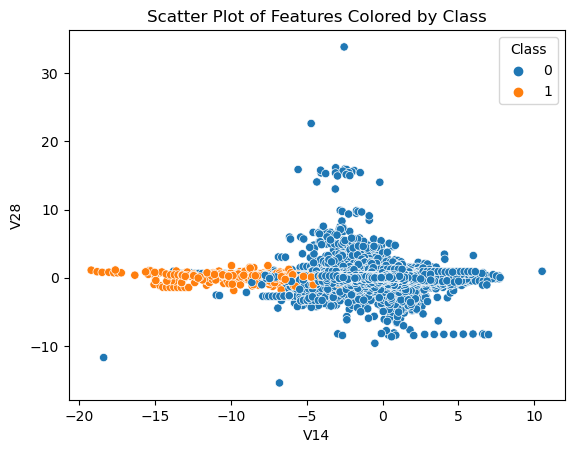

In [13]:
sns.scatterplot(
    x = "V14",
    y = "V28",
    hue = "Class",
    data=df
)
plt.title('Scatter Plot of Features Colored by Class')
plt.show()

### 3.8.4 Correlation of all columns:  Time,V1 to V28,Amount and Class

C:\Users\sruth\AppData\Local\Temp\ipykernel_34340\126378240.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(distance_matrix, method='ward')
C:\Users\sruth\AppData\Local\Temp\ipykernel_34340\126378240.py:47: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


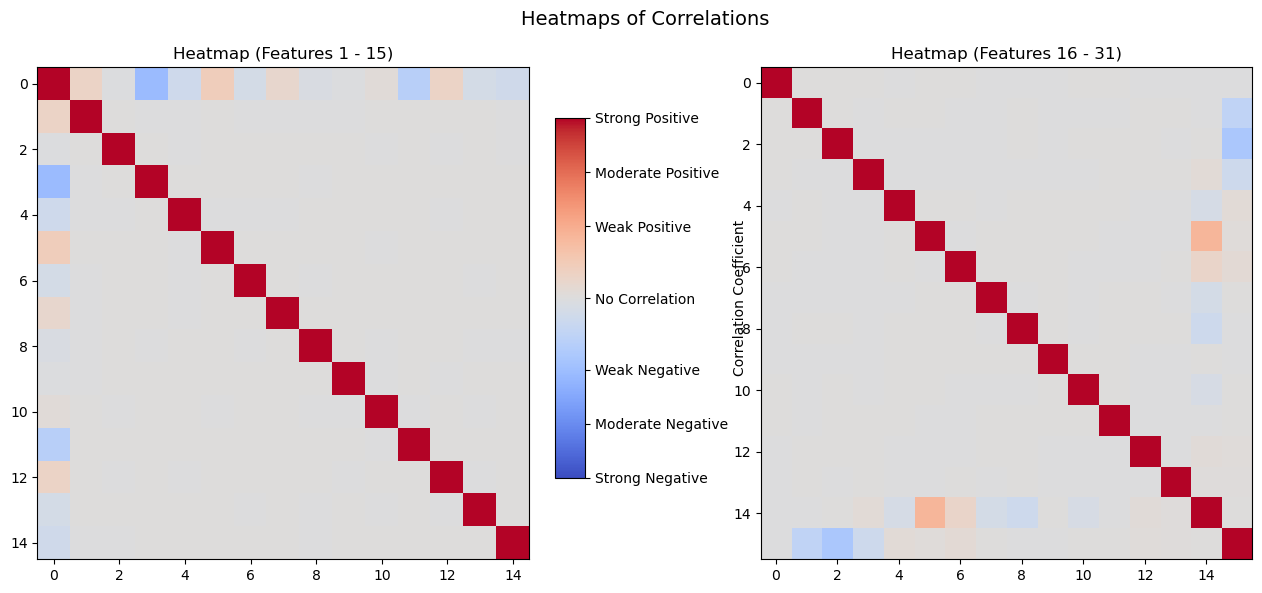

In [14]:
features = list(df.columns)

corr_matrix = df[features].corr()

distance_matrix = 1 - corr_matrix 
Z = linkage(distance_matrix, method='ward') 

p = 2  
cutoff = p * np.percentile(Z[:, 2], 100 - 25) 

criterion = 'inconsistent'
cluster_labels = fcluster(Z, cutoff, criterion) 

feature_to_cluster = {}
for i, feature in enumerate(features):
  feature_to_cluster[feature] = cluster_labels[i]

num_features = len(features)
halfway_point = int(num_features / 2)  
features_half1 = features[:halfway_point]
features_half2 = features[halfway_point:]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6)) 

cluster_corr_matrix1 = df[features_half1].corr()
im1 = ax1.imshow(cluster_corr_matrix1, cmap='coolwarm', vmin=-1, vmax=1)
ax1.set_title('Heatmap (Features 1 - {})'.format(halfway_point))


cluster_corr_matrix2 = df[features_half2].corr()
im2 = ax2.imshow(cluster_corr_matrix2, cmap='coolwarm', vmin=-1, vmax=1)
ax2.set_title('Heatmap (Features {} - {})'.format(halfway_point+1, len(features)))


cax = fig.add_axes([0.44, 0.2, 0.02, 0.6])


norm = plt.Normalize(vmin=-1, vmax=1)

sm = fig.colorbar(im2, cax=cax, label='Correlation Coefficient', norm=norm) 

sm.set_ticks([-1, -0.7, -0.4, 0, 0.4, 0.7, 1])
sm.set_ticklabels(['Strong Negative', 'Moderate Negative', 'Weak Negative',
                   'No Correlation', 'Weak Positive', 'Moderate Positive', 'Strong Positive'])

plt.suptitle('Heatmaps of Correlations', fontsize=14)
plt.tight_layout()
plt.show()


**Heatmaps of Correlations of features**

**Two Heatmaps**: The image consists of two heatmaps arranged side-by-side. This is because the number of features was likely large, so it was split into two halves of all my columns(Features 1 - 15 and Features 16 - 31) to improve readability.

**Color Scale**: The color intensity in each cell represents the correlation coefficient between the corresponding features. Blue indicates negative correlations (features tend to move in opposite directions), red indicates positive correlations (features tend to move in the same direction), and white or close to white indicates no significant correlation.

**Correlation analysis**

### 3.8.5 Frequency Dsitribuition for Features V1-V14

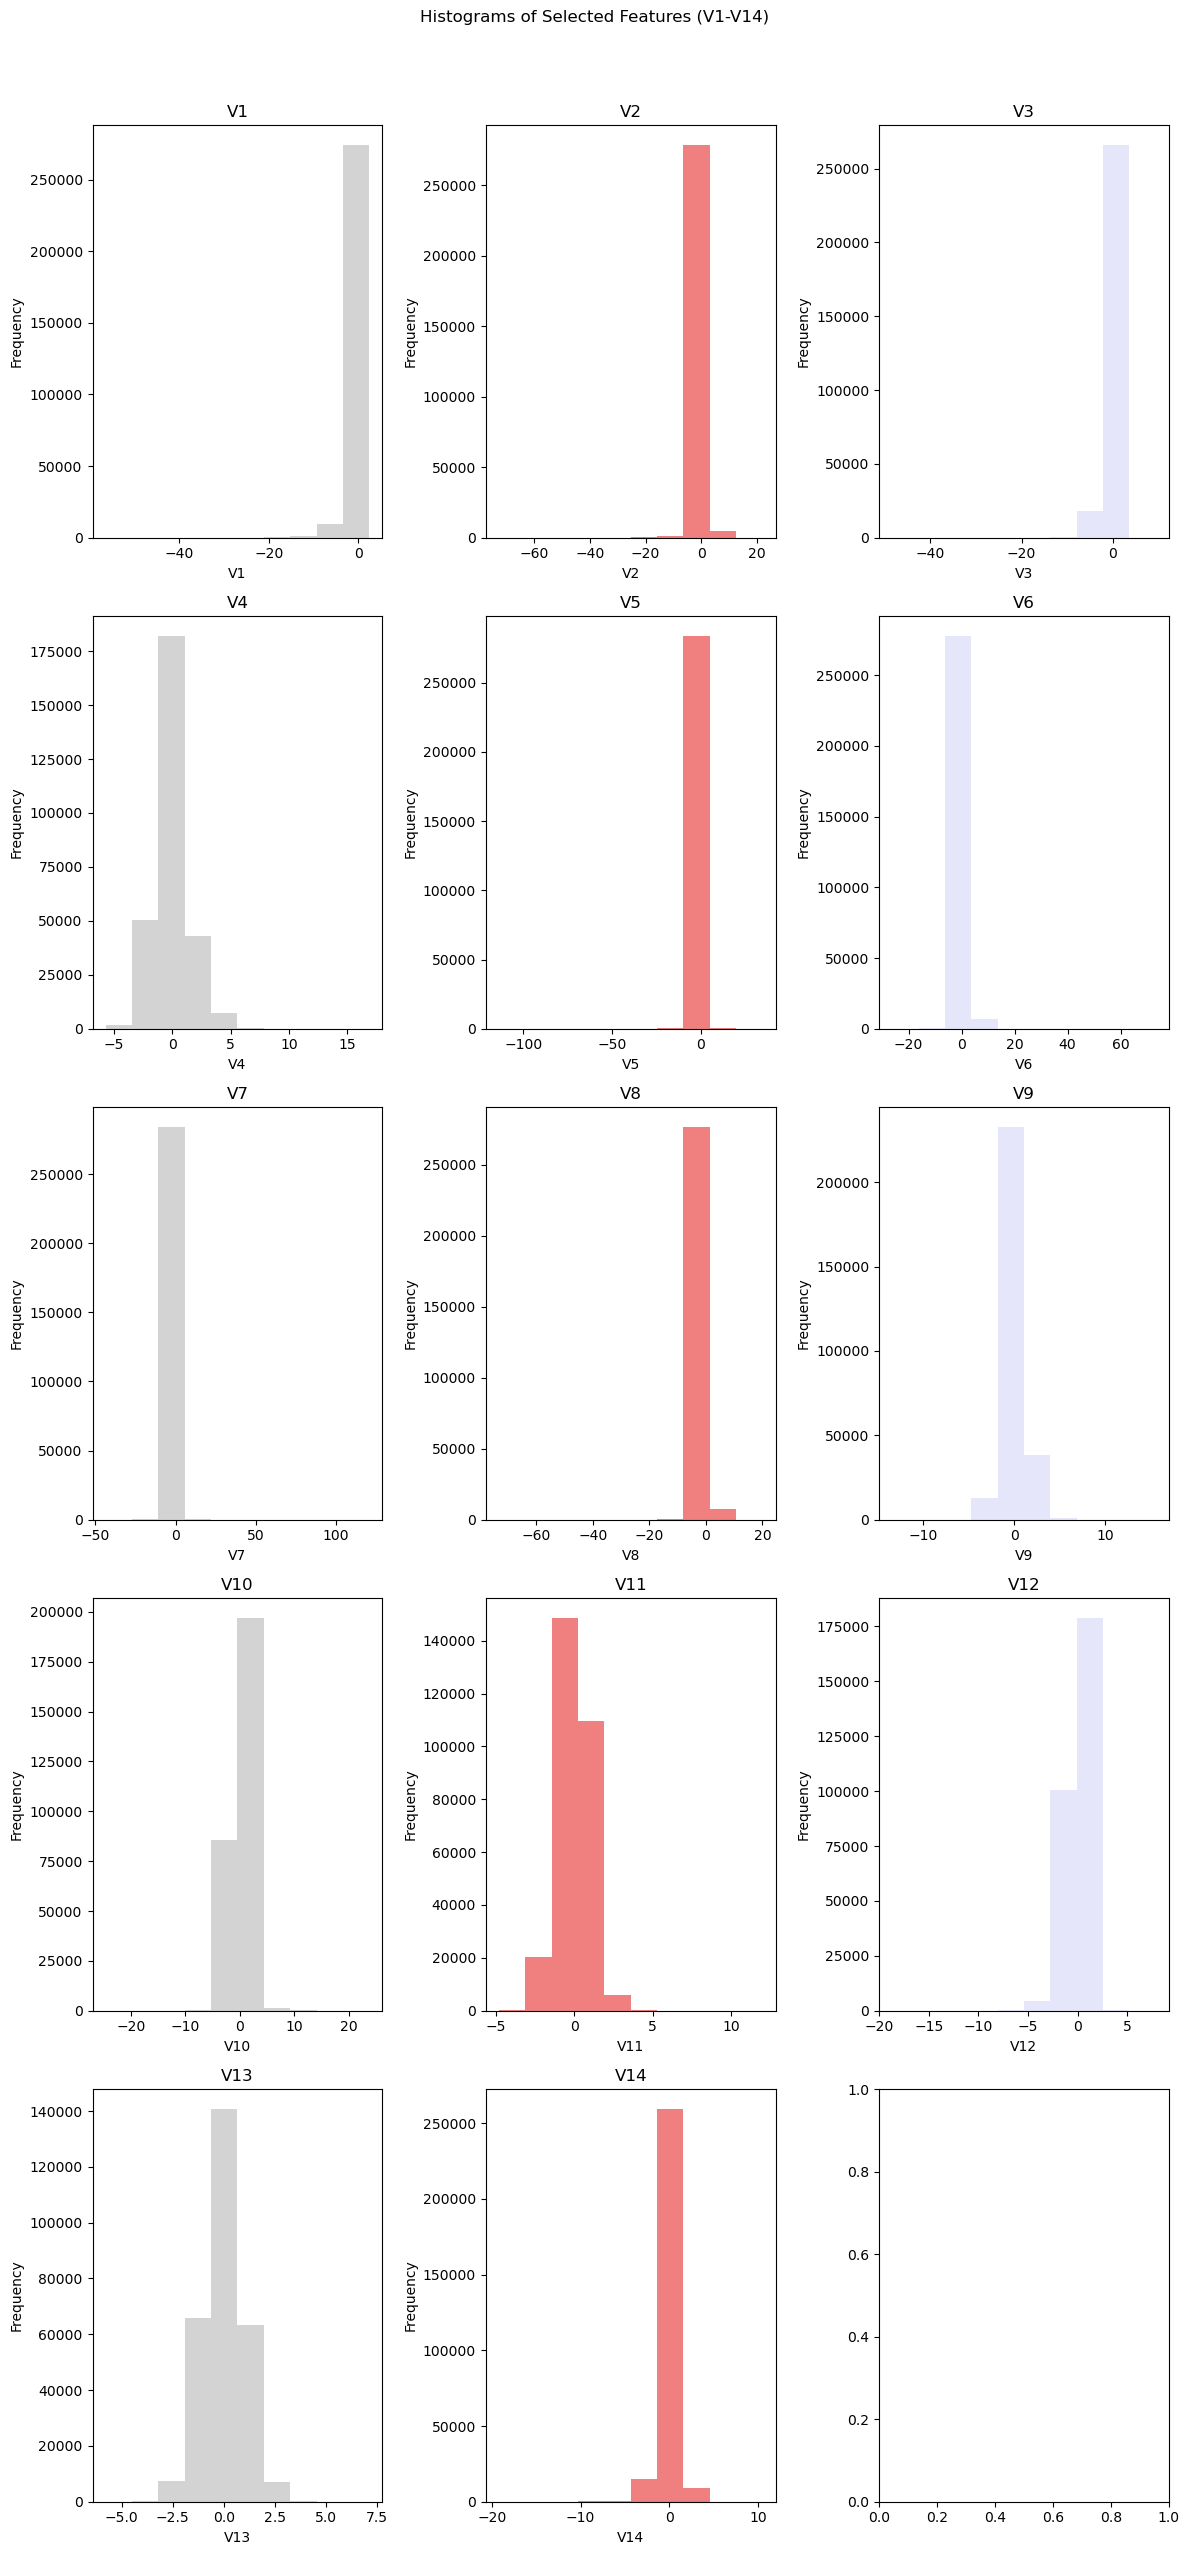

In [15]:
desired_features = ['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14']
df_subset = df[desired_features]  

nrows = int((len(desired_features) - 1) / 3) + 1 
ncols = min(3, len(desired_features)) 


fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 5)) 
pastel_colors = ['lightgray', 'lightcoral', 'lavender']

for i in range(nrows):
    for j in range(ncols):
        if i * ncols + j < len(desired_features):
            feature = desired_features[i * ncols + j]
            axes[i, j].hist(df_subset[feature], color=pastel_colors[j % len(pastel_colors)])
            axes[i, j].set_title(feature)
            axes[i, j].set_xlabel(feature)
            axes[i, j].set_ylabel('Frequency')


fig.suptitle('Histograms of Selected Features (V1-V14)', y=1.02)
plt.tight_layout()


plt.show()


### 3.8.6 Frequency Dsitribuition for Features V15-V28

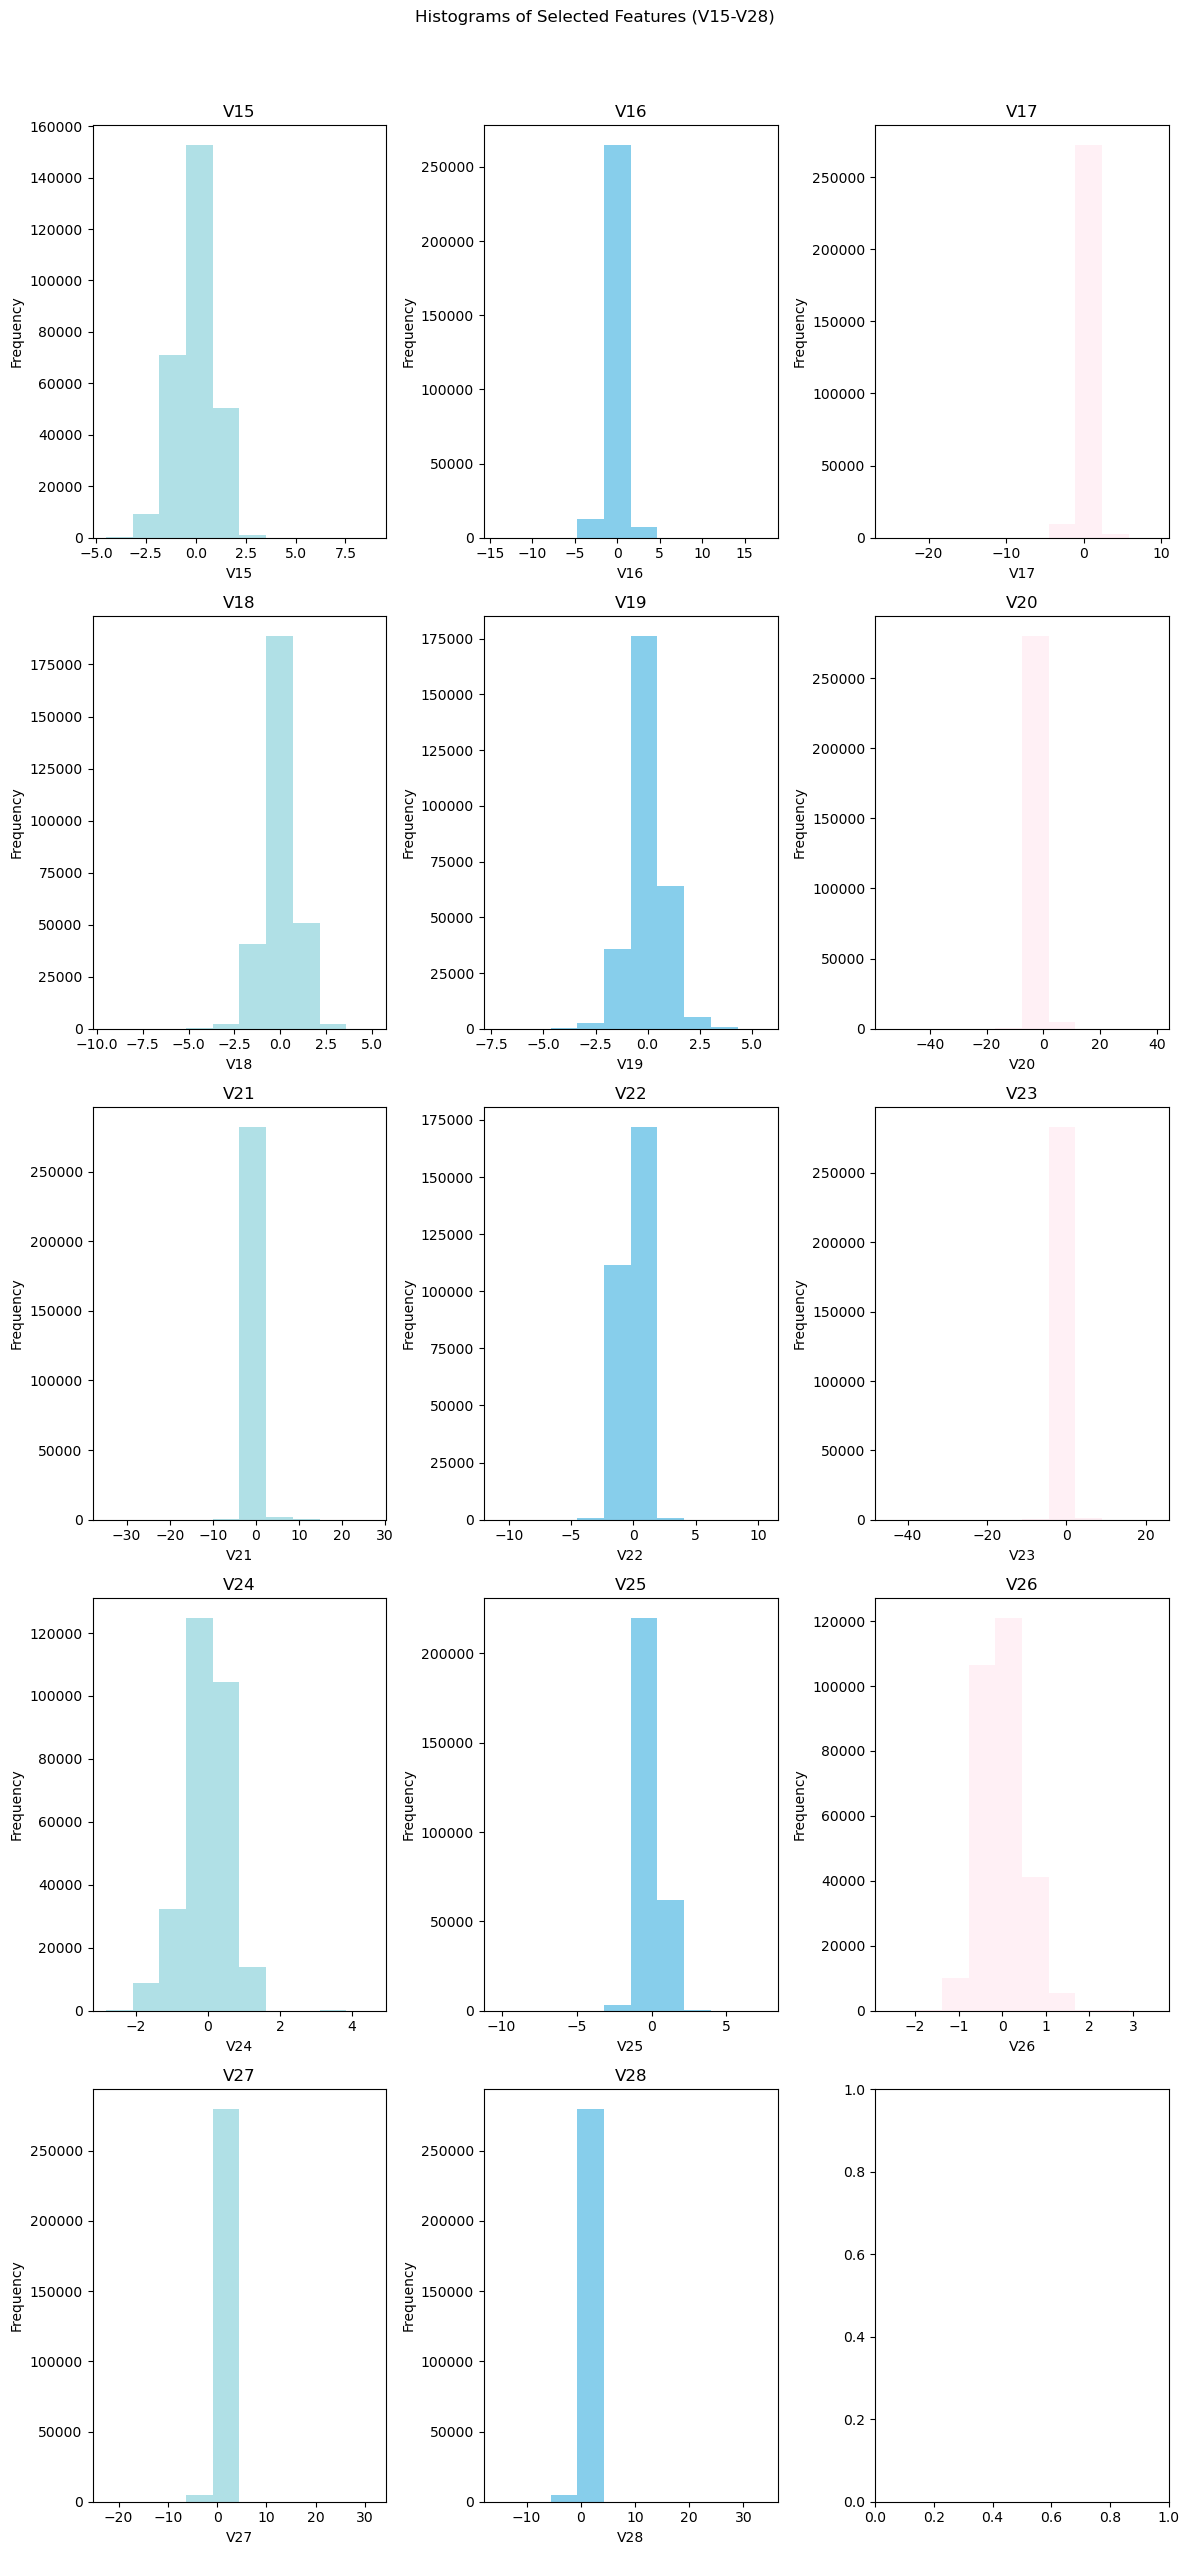

In [16]:
desired_features = ['V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28']
df_subset = df[desired_features]

nrows = int((len(desired_features) - 1) / 3) + 1  
ncols = min(3, len(desired_features)) 

fig, axes = plt.subplots(nrows, ncols, figsize=(12, nrows * 5)) 


pastel_colors = ['powderblue', 'skyblue', 'lavenderblush']

for i in range(nrows):
    for j in range(ncols):
        if i * ncols + j < len(desired_features):
            feature = desired_features[i * ncols + j]
            axes[i, j].hist(df_subset[feature], color=pastel_colors[j % len(pastel_colors)])  # Cycle through pastel colors
            axes[i, j].set_title(feature)
            axes[i, j].set_xlabel(feature)
            axes[i, j].set_ylabel('Frequency')

fig.suptitle('Histograms of Selected Features (V15-V28)', y=1.02)
plt.tight_layout()

plt.show()

## 4. Model Training 

## 4.1 Logistic Regression

### Logistic regression is a statistical method widely used for classification tasks in machine learning. It estimates the probability of an event occurring, based on a set of independent variables (features). Unlike linear regression, which predicts continuous outcomes, logistic regression focuses on binary classification problems, where the outcome can be one of two categories.

In [17]:
target_variable = "Class"
features = df.columns.drop(target_variable)  # All other columns are features

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target_variable], test_size=0.2, random_state=42)

In [19]:
model = LogisticRegression()
model.fit(X_train, y_train)

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [20]:
#Model Evaluation
y_pred = model.predict(X_test)

In [21]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9986306660580738


In [22]:
# Print classification report
print("Logistic Regression Classification Report: ")
print(classification_report(y_test, y_pred))

Logistic Regression Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.61      0.56      0.59        98

    accuracy                           1.00     56962
   macro avg       0.81      0.78      0.79     56962
weighted avg       1.00      1.00      1.00     56962



## Logistic Regression Model Performance

 The Logistic Regression model achieved an accuracy of **99.86%** on the held-out test set. This indicates a very strong performance, suggesting the model can effectively distinguish between the positive and negative classes in the data based on the provided features.
 
     However, I'm comparing this accuracy with other methods to find out what gives the best accuracy out of all.
 

## 4.2 Support Vector Machine:

### A support vector machine (SVM) is defined as a machine learning algorithm that uses supervised learning models to solve complex classification, regression, and outlier detection problems by performing optimal data transformations that determine boundaries between data points based on predefined classes, labels, or outputs. 

In [23]:
X = df.drop(target_variable, axis=1)  
y = df[target_variable]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Train SVM Model
svm_model = SVC()  # Initialize SVM model
svm_model.fit(X_train, y_train)  # Train the model

SVC()

In [26]:
# Make predictions on test set
svm_pred = svm_model.predict(X_test)

In [27]:
# Calculate accuracy
svm_acc = accuracy_score(y_test, svm_pred)

# Print results
print("SVM Accuracy:", svm_acc)

SVM Accuracy: 0.9982795547909132


In [28]:
if 'class_labels' in locals(): 
    print("SVM Classification Report:")
    print(classification_report(y_test, svm_pred, target_names=class_labels))
else:
    print("SVM Classification Report (using default class labels):")
    print(classification_report(y_test, svm_pred))


SVM Classification Report (using default class labels):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.00      0.00      0.00        98

    accuracy                           1.00     56962
   macro avg       0.50      0.50      0.50     56962
weighted avg       1.00      1.00      1.00     56962



C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 4.2.1 Model Comparison (Logistic Regression vs. SVM)

C:\Users\sruth\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


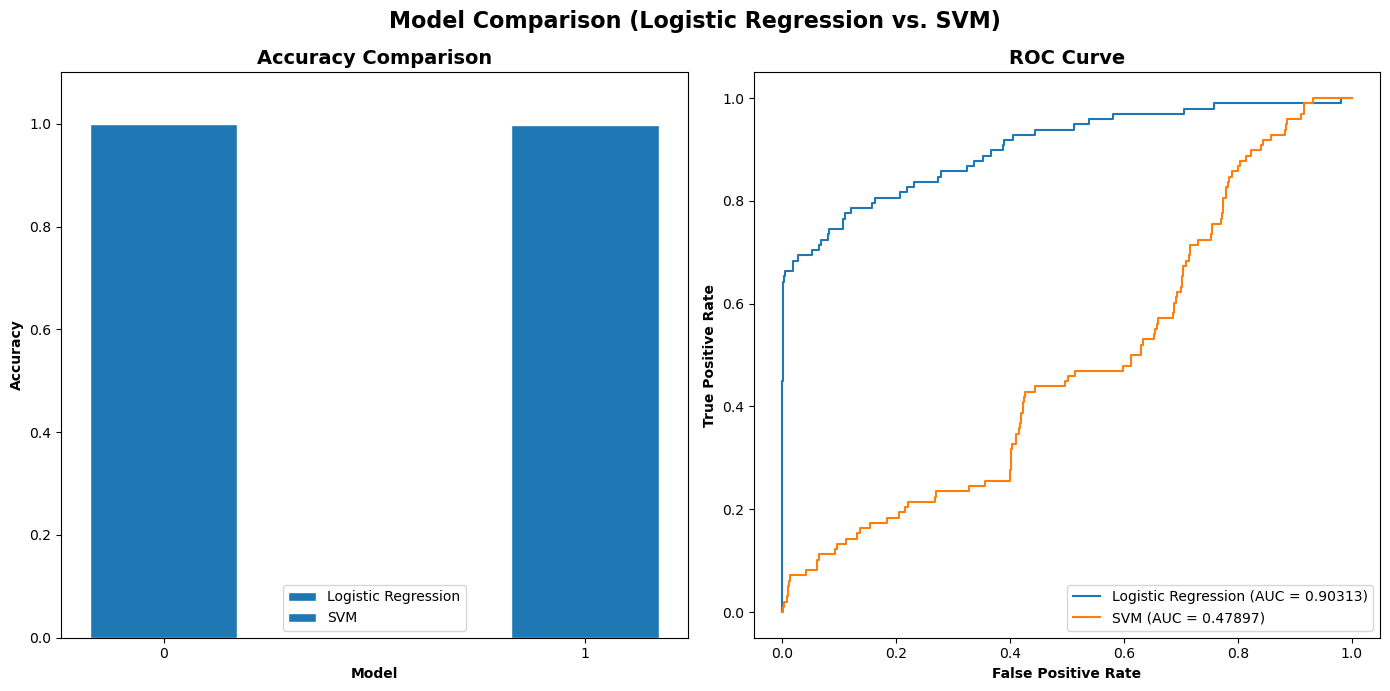

Logistic Regression Accuracy: 0.9986306660580738
SVM Accuracy: 0.9982795547909132


In [29]:
# Logistic Regression Model Training and Prediction
model = LogisticRegression()
model.fit(X_train, y_train)
logistic_pred = model.predict(X_test)

svm_model = SVC(probability=True)
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

logistic_acc = accuracy_score(y_test, logistic_pred)
svm_acc = accuracy_score(y_test, svm_pred)

y_true = y_test
y_pred_proba = model.predict_proba(X_test)[:, 1] 
fpr_logistic, tpr_logistic, _ = roc_curve(y_true, y_pred_proba)
logistic_auc = roc_auc_score(y_true, y_pred_proba)

svm_pred_proba = svm_model.predict_proba(X_test)[:, 1] 
fpr_svm, tpr_svm, _ = roc_curve(y_true, svm_pred_proba)
svm_auc = roc_auc_score(y_true, svm_pred_proba)

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model Comparison (Logistic Regression vs. SVM)', fontsize=16, fontweight='bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

accuracy_data = {'Logistic Regression': logistic_acc, 'SVM': svm_acc}
barWidth = 0.35
r1 = np.arange(len(accuracy_data))

ax1.bar(r1, accuracy_data.values(), width=barWidth, label=accuracy_data.keys(), edgecolor='white')

ax1.set_xlabel('Model', fontweight='bold')
ax1.set_xticks(r1)
ax1.set_ylabel('Accuracy', fontweight='bold')

ax1.set_ylim(0, 1.1)

ax1.set_title('Accuracy Comparison', fontsize=14, fontweight='bold')
ax1.legend()

ax2.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = {:0.5f})'.format(logistic_auc))
ax2.plot(fpr_svm, tpr_svm, label='SVM (AUC = {:0.5f})'.format(svm_auc))

ax2.set_xlabel('False Positive Rate', fontweight='bold')
ax2.set_ylabel('True Positive Rate', fontweight='bold')

ax2.set_title('ROC Curve', fontsize=14, fontweight='bold')
ax2.legend(loc=4)

plt.tight_layout()
plt.show()

print("Logistic Regression Accuracy:", logistic_acc)
print("SVM Accuracy:", svm_acc)

## Model Comparison for Logistic Regression vs. SVM:

- Based on the graphs, it suggest that the SVM model might outperform the Logistic Regression model based on the bar heights.
- The ROC curve for the Logistic Regression model provides more specific insights into its classification performance compared to SVM.

- Hence,I chose to compare the accuracy with XGBoost Classifier

## 4.3 XGBoost Classifer

- Xgboost (Extreme Gradient Boosting) is a powerful machine learning algorithm for supervised tasks like regression and classification. It excels at combining weak decision trees into a strong learner through a technique called gradient boosting, achieving high accuracy and efficiency.

- Xgboost's strength lies in its scalability, allowing it to handle massive datasets efficiently. This is achieved through parallel processing and optimizations for sparse data.  

In [30]:
xgb_model = XGBClassifier() 
xgb_model.fit(X_train, y_train) 

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [31]:
xgb_pred = xgb_model.predict(X_test)

In [32]:
xgb_accuracy = accuracy_score(y_test, xgb_pred)

In [33]:
print("XGBoost Accuracy:", xgb_accuracy)

XGBoost Accuracy: 0.9995611109160493


In [34]:
if 'class_labels' in locals(): 
    print("XGBoost Classification Report:")
    print(classification_report(y_test, xgb_pred, target_names=class_labels))
else:
    print("XGBoost Classification Report(using default class labels):")
    print(classification_report(y_test, xgb_pred))

XGBoost Classification Report(using default class labels):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.96      0.78      0.86        98

    accuracy                           1.00     56962
   macro avg       0.98      0.89      0.93     56962
weighted avg       1.00      1.00      1.00     56962



## 5. Model Comparision and Evaluation

### 5.1 Comparing Accuracy

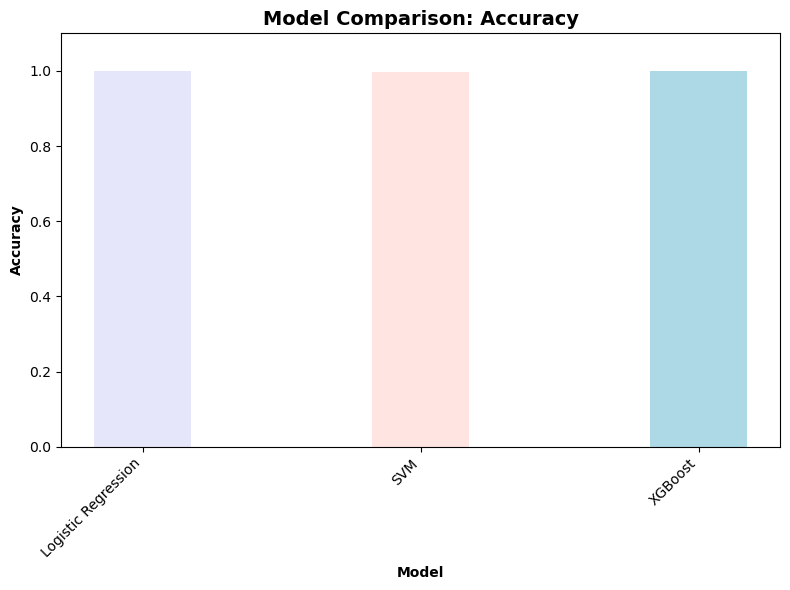

Evaluation Metrics:
Logistic Regression Accuracy: 0.9986306660580738
SVM Accuracy: 0.9982795547909132
XGBoost Accuracy: 0.9995611109160493


In [35]:
models = {
    'Logistic Regression': logistic_pred,
    'SVM': svm_pred,
    'XGBoost': xgb_pred
}
logistic_pred = model.predict(X_test)
svm_pred = svm_model.predict(X_test)
xgb_pred = xgb_model.predict(X_test)

# Calculate accuracy for each model
accuracy_data = {model_name: accuracy_score(y_test, predictions)
                  for model_name, predictions in models.items()}

bar_width = 0.35
pastel_colors = ['lavender', 'mistyrose', 'lightblue'] 

plt.figure(figsize=(8, 6)) 

r1 = np.arange(len(models)) 
plt.bar(r1, accuracy_data.values(), width=bar_width, label=accuracy_data.keys(), color=pastel_colors)

plt.xlabel('Model', fontweight='bold')
plt.xticks(r1, accuracy_data.keys(), rotation=45, ha='right')  
plt.ylabel('Accuracy', fontweight='bold')

plt.ylim(0, 1.1)


plt.title('Model Comparison: Accuracy', fontsize=14, fontweight='bold')

plt.tight_layout()

plt.show()

print("Evaluation Metrics:")
for model_name, predictions in models.items():
    print(f"{model_name} Accuracy:", accuracy_score(y_test, predictions))


### 5.2 Accuracy Curve

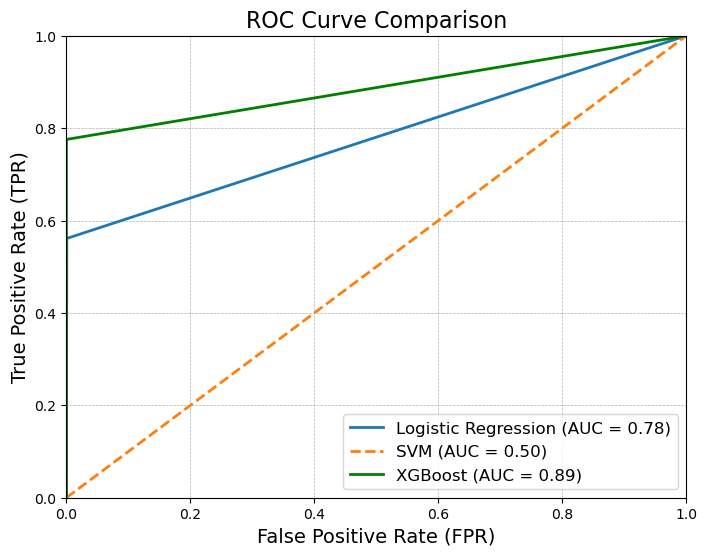

In [36]:
fpr_logistic, tpr_logistic, thresholds_logistic = roc_curve(y_test, logistic_pred)
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, svm_pred)
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(y_test, xgb_pred)

auc_logistic = auc(fpr_logistic, tpr_logistic)
auc_svm = auc(fpr_svm, tpr_svm)
auc_xgb = auc(fpr_xgb, tpr_xgb)


plt.figure(figsize=(8, 6))
plt.plot(fpr_logistic, tpr_logistic, label='Logistic Regression (AUC = %0.2f)' % auc_logistic, linewidth=2) 
plt.plot(fpr_svm, tpr_svm, label='SVM (AUC = %0.2f)' % auc_svm, linestyle='--', linewidth=2) 
plt.plot(fpr_xgb, tpr_xgb, label='XGBoost (AUC = %0.2f)' % auc_xgb, color='green', linewidth=2) 

# Configure plot
plt.title('ROC Curve Comparison', fontsize=16) 
plt.xlabel('False Positive Rate (FPR)', fontsize=14)  
plt.ylabel('True Positive Rate (TPR)', fontsize=14)
plt.legend(loc='lower right', fontsize=12) 
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0]) 

plt.show()




* Logistic Regression (AUC = 0.78)
* SVM (AUC = 0.50)
* XGBoost (AUC = 0.89)



* **AUC**: It represents the probability that a randomly chosen positive example will rank higher than a randomly chosen negative example. An AUC of 1 indicates perfect discrimination between positive and negative classes, while 0.5 represents a random guess.

* **Interpretation**:
    * **XGBoost (0.89)**: This model has the highest AUC, suggesting it's the best at distinguishing between positive and negative classes in this dataset.
    * **Logistic Regression (0.78)**: This model performs moderately well, but not as good as XGBoost. There's a chance of a random guess performing slightly better than this model. 
    * **SVM (0.50)**: This model's AUC is 0.5, which is equivalent to a random guess. It doesn't perform well in differentiating between the classes.

### 5.3 Precision-Recall Curve 

Given the class imbalance ratio, we are measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC).

Logistic Regression AUPRC: 0.678408313104627
SVM AUPRC: 0.5008602226045433
XGBoost AUPRC: 0.8689608714656027


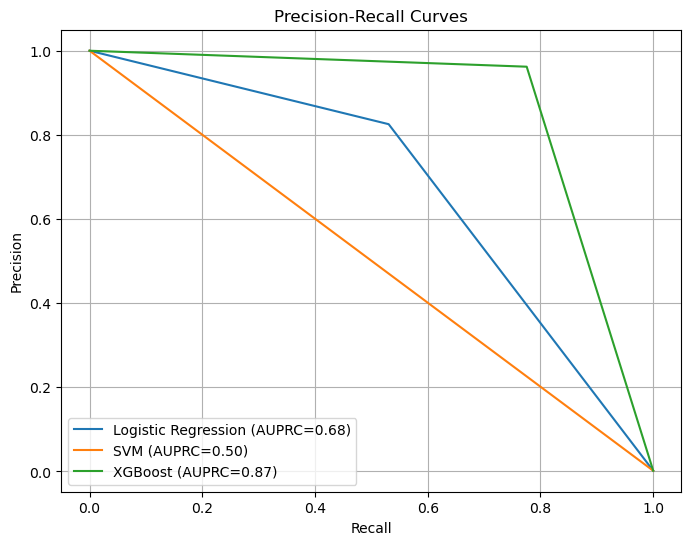

In [37]:
X = df.drop('Class', axis=1) 
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_lr = LogisticRegression(solver='liblinear') 
model_lr.fit(X_train, y_train)
y_pred_lr = model_lr.predict(X_test)

model_svm = SVC()
model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)
y_pred_xgb = model_xgb.predict(X_test)

precision_lr, recall_lr, thresholds_lr = precision_recall_curve(y_test, y_pred_lr)
auprc_lr = auc(recall_lr, precision_lr)

precision_svm, recall_svm, thresholds_svm = precision_recall_curve(y_test, y_pred_svm)
auprc_svm = auc(recall_svm, precision_svm)

precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(y_test, y_pred_xgb)
auprc_xgb = auc(recall_xgb, precision_xgb)

print("Logistic Regression AUPRC:", auprc_lr)
print("SVM AUPRC:", auprc_svm)
print("XGBoost AUPRC:", auprc_xgb)

plt.figure(figsize=(8, 6))
plt.plot(recall_lr, precision_lr, label='Logistic Regression (AUPRC=%0.2f)' % auprc_lr)
plt.plot(recall_svm, precision_svm, label='SVM (AUPRC=%0.2f)' % auprc_svm)
plt.plot(recall_xgb, precision_xgb, label='XGBoost (AUPRC=%0.2f)' % auprc_xgb)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)
plt.show()

- XGBoost achieved the highest AUPRC score of 0.869, indicating a significantly better ability to balance precision and recall in identifying positive cases compared to the other models.
- Logistic Regression achieved a moderate AUPRC of 0.678, suggesting some ability to distinguish positive cases but room for improvement.
- SVM performed the worst with an AUPRC of 0.501, which implies difficulty separating positive and negative cases.

## Conclusion
- Based on the AUPRC scores, XGBoost (0.869) emerged as the clear winner, demonstrating a strong ability to balance precision and recall in identifying positive cases. Logistic Regression (0.678) showed some potential for distinguishing positive instances, but there's room for improvement. SVM (0.501) exhibited the weakest performance, suggesting difficulty in separating positive and negative cases. Therefore, XGBoost is the recommended model for this task due to its superior performance in identifying positive cases while minimizing false positives.

## Future Considerations

- Check for better accuracy figures by employing Oversampling and Undersampling.
- Dashboard and Fraud Detecting Web Application Using Streamlit.